-----
# 01 - Exploratory Analysis

The purpose of this notebook is to perform an exploratory analysis of the training / test Cercare datasets, including :


- Dataset Overview and Basic Statistics
- Diagnosis Class Distribution Analysis
- Scan Distribution per Patient
- Primitif Occurrence and Overlap
- **Automated Feature Reports using Sweetviz**


In [16]:
import matplotlib.pyplot as plt
from pathlib import Path
import sweetviz as sv
import seaborn as sns
import pandas as pd

import constants
from utils import format_dataframe, add_ratio_columns

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Default Plot Style : 
sns.set(style="whitegrid")


## 1. Load Data 

In [39]:
# Set path to Data Directory : 
DIR_DATA = Path.cwd() / "data"

# Check existence to training/test files : 
print(fr"Data Directory    : {str(DIR_DATA)}")
print(fr"Train Data exists : {(DIR_DATA / 'cercare_training_data.xlsx').exists()}")
print(fr"Test Data exists  : {(DIR_DATA / 'cercare_test_data.xlsx').exists()}")


Data Directory    : /home/maichi/work/my_projects/CercareStatAnalysis/data
Train Data exists : True
Test Data exists  : True


In [37]:
# Load Cercare Training / Test Excel spreadsheets :
df_data = pd.read_excel(DIR_DATA / "cercare_training_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)
df_test = pd.read_excel(DIR_DATA / "cercare_test_data.xlsx").rename(columns=constants.DICT_RENAMING_MAPPING)

print("Data Loaded Successfully ! ")


Data Loaded Successfully ! 


In [38]:
# Format dataframes : 
df_data = format_dataframe(df=df_data)
df_test = format_dataframe(df=df_test)

print("\nColumn types after conversion:")
dtypes_df = pd.DataFrame(df_data.dtypes, columns=["dtype"]).T
display(dtypes_df)



Column types after conversion:


,num_patient,Primitifs,Diagnosis,ADC_path,ADC_control,CBV_corr_path,CBV_corr_control,CBV_noncorr_path,CBV_noncorr_control,DELAY_lésion,...,rCMRO2_lésion,rCMRO2_control,COV_lésion,COV_control,LOI_lésion,LOI_control,rRHP,pred_wo_tram,Tram,pred_w_tram
dtype,float64,object,int64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64


## 2. Dataset Summary

In [5]:
def print_dataset_summary(df, phase):

    print("=" * 40)
    print(f"\t  {phase} Set Summary")
    print("=" * 40)
    print(f"Rows               : {df.shape[0]}")
    print(f"Columns            : {df.shape[1]}")
    print(f"Unique Patients    : {df['num_patient'].nunique()}")
    print(f"Column Names       : {list(df.columns)}\n")

    print("=" * 40)
    print("\t — Summary Statistics — ")
    print("=" * 40)
    display(df.describe())
    

In [6]:
print_dataset_summary(df=df_data, phase="Train")

	  Train Set Summary
Rows               : 182
Columns            : 29
Unique Patients    : 96
Column Names       : ['num_patient', 'Primitifs', 'Diagnosis', 'ADC_path', 'ADC_control', 'CBV_corr_path', 'CBV_corr_control', 'CBV_noncorr_path', 'CBV_noncorr_control', 'DELAY_lésion', 'DELAY_control', 'CTH_lésion', 'CTH_control', 'CTH MAX_lésion', 'CTH MAX_control', 'OEF_lésion', 'OEF_control', 'rLEAKAGE_lésion', 'rLEAKAGE_control', 'rCMRO2_lésion', 'rCMRO2_control', 'COV_lésion', 'COV_control', 'LOI_lésion', 'LOI_control', 'rRHP', 'pred_wo_tram', 'Tram', 'pred_w_tram']

	 — Summary Statistics — 


,num_patient,Diagnosis,ADC_path,ADC_control,CBV_corr_path,CBV_corr_control,CBV_noncorr_path,CBV_noncorr_control,DELAY_lésion,DELAY_control,...,rCMRO2_lésion,rCMRO2_control,COV_lésion,COV_control,LOI_lésion,LOI_control,rRHP,pred_wo_tram,Tram,pred_w_tram
count,182.000000,182.00000,180.000000,180.000000,171.000000,178.000000,181.000000,181.000000,181.000000,177.000000,...,181.000000,181.000000,180.000000,179.000000,180.000000,178.000000,176.000000,182.000000,176.000000,181.000000
mean,45.829670,0.39011,1.264450,0.921056,3.295322,3.131067,3.538011,3.136133,1.403923,1.629887,...,387.761867,457.695486,1.462000,1.612626,0.019292,0.001614,0.831790,0.225275,0.272727,0.303867
std,28.406065,0.48912,0.438532,0.346977,2.931245,1.933728,2.911212,1.842984,1.760170,2.111195,...,312.799435,310.663595,1.247696,0.913584,0.101318,0.015013,0.589908,0.418916,0.446632,0.461202
min,1.000000,0.00000,0.300000,0.100000,0.200000,0.120000,0.200000,0.400000,0.020000,0.010000,...,17.640000,23.900000,0.030000,0.030000,0.000000,0.000000,0.004000,0.000000,0.000000,0.000000
25%,21.250000,0.00000,0.995000,0.757500,1.410000,2.082500,1.510000,2.110000,0.250000,0.400000,...,125.770000,229.430000,0.520000,1.025000,0.000000,0.000000,0.440000,0.000000,0.000000,0.000000
50%,43.500000,0.00000,1.190000,0.830000,2.230000,2.820000,2.600000,2.800000,0.550000,0.870000,...,279.110000,396.100000,1.140000,1.560000,0.000000,0.000000,0.780000,0.000000,0.000000,0.000000
75%,71.750000,1.00000,1.510000,1.000000,4.475000,3.740000,4.870000,3.740000,1.980000,2.080000,...,655.700000,643.150000,2.050000,2.035000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,96.000000,1.00000,3.200000,3.000000,18.240000,17.000000,19.340000,18.000000,8.660000,15.580000,...,1169.030000,2181.740000,9.640000,4.200000,1.270000,0.190000,3.250000,1.000000,1.000000,1.000000


In [7]:
print_dataset_summary(df=df_test, phase="Test")

	  Test Set Summary
Rows               : 23
Columns            : 30
Unique Patients    : 23
Column Names       : ['num_patient', 'Primitifs', 'Immunothérapie', 'Diagnosis', 'ADC_path', 'ADC_control', 'CBV_corr_path', 'CBV_corr_control', 'CBV_noncorr_path', 'CBV_noncorr_control', 'DELAY_lésion', 'DELAY_control', 'CTH_lésion', 'CTH_control', 'CTH MAX_lésion', 'CTH MAX_control', 'OEF_lésion', 'OEF_control', 'rLEAKAGE_lésion', 'rLEAKAGE_control', 'rCMRO2_lésion', 'rCMRO2_control', 'COV_lésion', 'COV_control', 'LOI_lésion', 'LOI_control', 'rRHP', 'pred_wo_tram', 'Tram', 'pred_w_tram']

	 — Summary Statistics — 


,num_patient,Immunothérapie,Diagnosis,ADC_path,ADC_control,CBV_corr_path,CBV_corr_control,CBV_noncorr_path,CBV_noncorr_control,DELAY_lésion,...,rCMRO2_lésion,rCMRO2_control,COV_lésion,COV_control,LOI_lésion,LOI_control,rRHP,pred_wo_tram,Tram,pred_w_tram
count,23.00000,23.000000,23.000000,0.0,0.0,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,0.0,0.0,0.0,23.000000,23.000000,23.000000
mean,12.00000,0.260870,0.304348,NaN,NaN,1.836957,1.144348,7.299130,3.840435,1.353478,...,14.034348,11.502609,1.399130,1.179130,NaN,NaN,NaN,0.434783,0.304348,0.304348
std,6.78233,0.448978,0.470472,NaN,NaN,0.987809,0.465850,4.754701,1.327001,1.057925,...,6.570700,4.335431,0.424574,0.335233,NaN,NaN,NaN,0.506870,0.470472,0.470472
min,1.00000,0.000000,0.000000,NaN,NaN,0.390000,0.360000,1.610000,1.200000,0.060000,...,2.230000,3.960000,0.890000,0.980000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6.50000,0.000000,0.000000,NaN,NaN,1.125000,0.835000,3.900000,3.040000,0.440000,...,8.720000,8.245000,1.125000,1.020000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,12.00000,0.000000,0.000000,NaN,NaN,1.590000,1.060000,6.490000,4.010000,1.310000,...,12.010000,10.600000,1.260000,1.100000,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,17.50000,0.500000,1.000000,NaN,NaN,2.215000,1.315000,8.930000,4.620000,2.115000,...,18.705000,13.620000,1.660000,1.175000,NaN,NaN,NaN,1.000000,1.000000,1.000000
max,23.00000,1.000000,1.000000,NaN,NaN,4.200000,2.200000,18.240000,7.370000,3.670000,...,26.500000,20.680000,2.800000,2.590000,NaN,NaN,NaN,1.000000,1.000000,1.000000


## 3. Class Balance 

In [8]:
# Class imbalance : 
def print_diagnosis_distribution(df, label, column="Diagnosis"):
    counts = df[column].value_counts().rename(index=constants.LABEL_MAP)
    percentages = (counts / counts.sum() * 100).round(2)
    summary = pd.DataFrame({"Count": counts, "Percentage (%)": percentages})

    print("\n" + "=" * 40)
    print(f" Diagnosis Distribution — {label}")
    print("=" * 40)
    display(summary)


In [9]:
print_diagnosis_distribution(df_data, "Training Set")


 Diagnosis Distribution — Training Set


,Count,Percentage (%)
Diagnosis,,
Radiation Necrosis,111,60.99
Tumor Recurrence,71,39.01


In [10]:
print_diagnosis_distribution(df_test, "Test Set")



 Diagnosis Distribution — Test Set


,Count,Percentage (%)
Diagnosis,,
Radiation Necrosis,16,69.57
Tumor Recurrence,7,30.43


## 4. Scan Distribution Per Patient

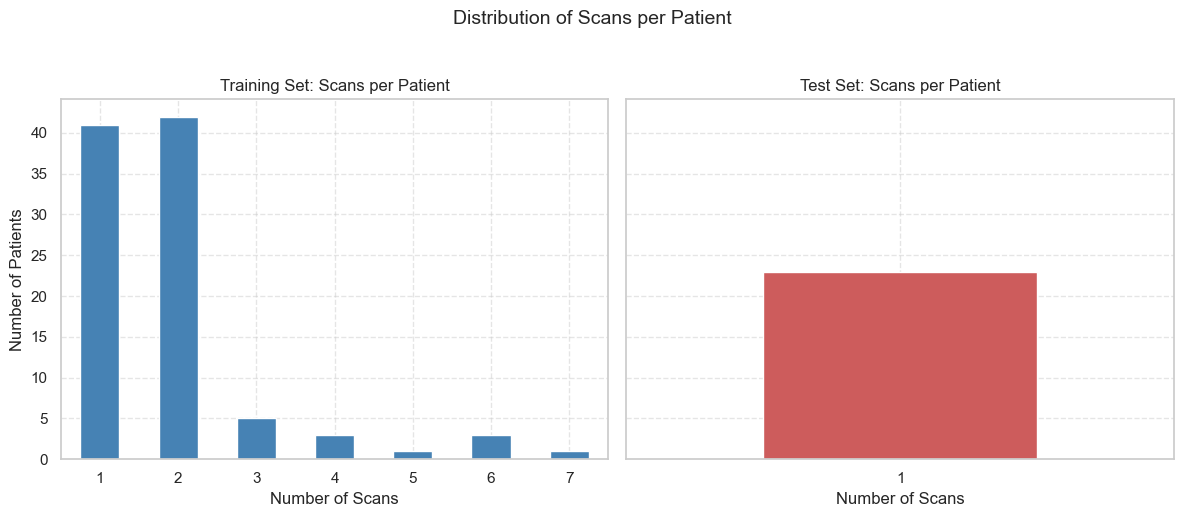

In [11]:
train_scan_counts = df_data["num_patient"].value_counts()
test_scan_counts = df_test["num_patient"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
#  Training set 
train_scan_counts.value_counts().sort_index().plot.bar(
    ax=axes[0], rot=0, color="steelblue"
)
axes[0].set_title("Training Set: Scans per Patient")
axes[0].set_xlabel("Number of Scans")
axes[0].set_ylabel("Number of Patients")
axes[0].grid(True, linestyle="--", alpha=0.5)

#  Test set 
test_scan_counts.value_counts().sort_index().plot.bar(
    ax=axes[1], rot=0, color="indianred"
)
axes[1].set_title("Test Set: Scans per Patient")
axes[1].set_xlabel("Number of Scans")
axes[1].grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Distribution of Scans per Patient", fontsize=14, y=1.03)
plt.tight_layout()
plt.show()


## 5. Primitifs Overview

In [12]:
# === Unique Primitifs ===
train_prims = sorted(df_data["Primitifs"].unique())
test_prims = sorted(df_test["Primitifs"].unique())

print("=" * 20)
print(" Unique Primitifs")
print("=" * 20)
print("Training Set:", train_prims)
print("Test Set    :", test_prims)
print()


 Unique Primitifs
Training Set: ['CBNPC', 'Lymphome', 'Melanome', 'Ovaire', 'Rein', 'Sarcome', 'Sein', 'Thyroide Papillaire', 'colon']
Test Set    : ['CBNPC', 'CBPC', 'Endomètre', 'Melanome', 'Ovaire', 'Rein', 'Sein', 'Thyroïde', 'Œsophage']



In [13]:
# === Primitifs Distribution (Count Summary) ===
print(" Primitifs Distribution — Training Set")
train_primitifs_df = df_data["Primitifs"].value_counts().sort_index().to_frame().T
display(train_primitifs_df)

print(" Primitifs Distribution — Test Set")
test_primitifs_df = df_test["Primitifs"].value_counts().sort_index().to_frame().T
display(test_primitifs_df)


 Primitifs Distribution — Training Set


Primitifs,CBNPC,Lymphome,Melanome,Ovaire,Rein,Sarcome,Sein,Thyroide Papillaire,colon
count,81,1,48,6,3,8,25,9,1


 Primitifs Distribution — Test Set


Primitifs,CBNPC,CBPC,Endomètre,Melanome,Ovaire,Rein,Sein,Thyroïde,Œsophage
count,6,2,1,2,1,1,7,2,1


In [14]:
# === Patients with Multiple Primitifs ===
train_multi = df_data[["num_patient", "Primitifs"]].drop_duplicates()
multi_counts = train_multi.groupby("num_patient").count()
train_with_multiple = multi_counts[multi_counts["Primitifs"] > 1]

print("=" * 50)
print(f" Patients with >1 Primitif in Training Set: {len(train_with_multiple)}")
print("=" * 50)
display(df_data[df_data["num_patient"].isin(train_with_multiple.index)])


 Patients with >1 Primitif in Training Set: 1


,num_patient,Primitifs,Diagnosis,ADC_path,ADC_control,CBV_corr_path,CBV_corr_control,CBV_noncorr_path,CBV_noncorr_control,DELAY_lésion,...,rCMRO2_lésion,rCMRO2_control,COV_lésion,COV_control,LOI_lésion,LOI_control,rRHP,pred_wo_tram,Tram,pred_w_tram
96,54.0,Melanome,0,1.57,0.90,7.50,1.65,7.37,1.65,0.07,...,277.69,827.82,0.57,1.69,0.00,0.0,1.380,0,0.0,0.0
97,54.0,Melanome,0,1.67,0.57,0.42,4.49,0.20,4.49,1.44,...,349.17,940.90,0.19,0.89,0.00,0.0,0.043,0,0.0,0.0
149,54.0,CBNPC,0,1.67,0.57,0.42,4.49,0.20,4.49,0.20,...,125.77,796.74,0.39,0.94,0.00,0.0,0.040,0,0.0,0.0
150,54.0,CBNPC,0,1.57,0.90,1.65,7.50,7.37,1.65,0.96,...,163.12,889.95,0.97,2.00,0.00,0.0,1.380,0,0.0,0.0
151,54.0,CBNPC,0,1.67,0.57,0.42,4.49,0.20,4.49,1.21,...,105.36,1056.35,0.89,3.10,0.09,0.0,0.043,0,0.0,0.0
152,54.0,CBNPC,0,1.57,0.90,1.65,7.50,7.37,1.65,1.82,...,130.25,1006.98,1.13,3.30,0.01,0.0,1.375,0,0.0,0.0


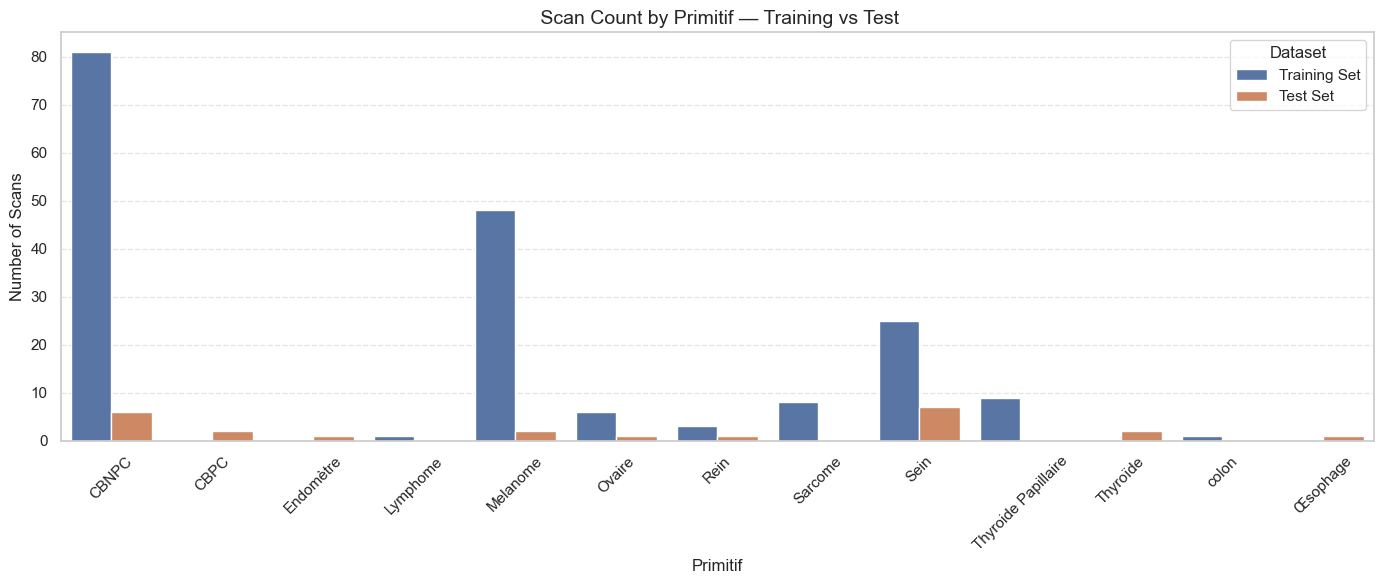

In [15]:
# Unified list of primitifs
all_primitifs = sorted(set(df_data["Primitifs"].unique()) | set(df_test["Primitifs"].unique()))

# Count per primitifs
train_counts = df_data["Primitifs"].value_counts().reindex(all_primitifs, fill_value=0)
test_counts = df_test["Primitifs"].value_counts().reindex(all_primitifs, fill_value=0)

primitifs_df = pd.DataFrame({
    "Primitif": all_primitifs,
    "Training Set": train_counts.values,
    "Test Set": test_counts.values
})
primitifs_long = primitifs_df.melt(id_vars="Primitif", var_name="Dataset", value_name="Count")

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=primitifs_long, x="Primitif", y="Count", hue="Dataset")

plt.title(" Scan Count by Primitif — Training vs Test", fontsize=14)
plt.xlabel("Primitif")
plt.ylabel("Number of Scans")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## 6 Feature Report with Sweetviz

In [17]:
DIR_REPORTS = Path.cwd() / "sweetviz_reports"
DIR_REPORTS.mkdir(parents=True, exist_ok=True)

print(fr"Reports Directory : {str(DIR_REPORTS)}")


Reports Directory : /home/maichi/work/my_projects/CercareStatAnalysis/reports


In [21]:
# Add the ratio columns : 
add_ratio_columns(df_data)
add_ratio_columns(df_test)

original_cols = [
    col for col in df_data.columns
    if not col.endswith("ratio") and col not in ["num_patient", "Tram"]
]

ratio_cols = [col for col in df_data.columns if col.endswith("ratio")]
ratio_cols = ["Diagnosis"] + ratio_cols  # Ensure Diagnosis is included


### 6.1. Original Features Sweetviz Report (for Training)

In [32]:
print("Generating Sweetviz report for original features...")

path_report_original = DIR_REPORTS / "sweetviz_original.html"

if not path_report_original.exists():
    report_original = sv.analyze(df_data[original_cols])
    report_original.show_html(filepath=str(path_report_original))
else:
    print(fr"{str(path_report_original)} already exists !")
    

Generating Sweetviz report for original features...
/home/maichi/work/my_projects/CercareStatAnalysis/reports/sweetviz_original.html already exists !


### 6.2. Ratio Features Sweetviz Report (for Training)

In [33]:
print("Generating Sweetviz report for ratio features...")

path_report_ratios = DIR_REPORTS / "sweetviz_ratios.html"

if not path_report_ratios.exists():
    report_ratio = sv.analyze(df_data[ratio_cols])
    report_ratio.show_html(filepath=str(path_report_ratios))
else:
    print(f"{str(path_report_ratios)} already exists!")


Generating Sweetviz report for ratio features...
/home/maichi/work/my_projects/CercareStatAnalysis/reports/sweetviz_ratios.html already exists!


### 6.3. Train vs Test – Original Features Sweetviz Report

In [34]:
print("Generating Sweetviz comparison report (original features)...")

path_comparison_original = DIR_REPORTS / "sweetviz_train_vs_test.html"

if not path_comparison_original.exists():
    comparison_original = sv.compare(
        [df_data[original_cols], "Training Set"],
        [df_test[original_cols], "Test Set"]
    )
    comparison_original.show_html(filepath=str(path_comparison_original))
else:
    print(f"{str(path_comparison_original)} already exists!")


Generating Sweetviz comparison report (original features)...


                                             |                                                                …

Report /home/maichi/work/my_projects/CercareStatAnalysis/reports/sweetviz_train_vs_test.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 6.4. Train vs Test – Ratio Features Sweetviz Report

In [35]:
print("Generating Sweetviz comparison report (ratio features)...")

path_comparison_ratios = DIR_REPORTS / "sweetviz_ratios_train_vs_test.html"

if not path_comparison_ratios.exists():
    comparison_ratios = sv.compare(
        [df_data[ratio_cols], "Training Set"],
        [df_test[ratio_cols], "Test Set"]
    )
    comparison_ratios.show_html(filepath=str(path_comparison_ratios))
else:
    print(f"{str(path_comparison_ratios)} already exists!")


Generating Sweetviz comparison report (ratio features)...


                                             |                                                                …

Report /home/maichi/work/my_projects/CercareStatAnalysis/reports/sweetviz_ratios_train_vs_test.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
